# Breast Cancer Analysis - EDA, PCA and Hyperparameter Tuning

## Goal: To build a machine learning model that can differentiate between benign and malignant breast cancer

### Context

Breast cancer is one of the most commonly occuring cancers worldwide and according to global statistics, it reperesents a very high percentage of cancer-related deaths
In this notebook, our goal is to build a machine learning model that can differentiate benign breast cancer lumps from the malignant ones

### About the dataset

**- Dataset:** Breast Cancer Wisconsin (Diagnostic) Data Set
<br />Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
<br /> 
<br /> **- Attribute Information:**
<br /> 
* **ID number**
* **Diagnosis** (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) **radius** (mean of distances from center to points on the perimeter)
<br /> 
b) **texture** (standard deviation of gray-scale values)
<br /> 
c) **perimeter**
<br /> 
d) **area**
<br /> 
e) **smoothness** (local variation in radius lengths)
<br /> 
f) **compactness** (perimeter^2 / area - 1.0)
<br /> 
g) **concavity** (severity of concave portions of the contour)
<br /> 
h) **concave points** (number of concave portions of the contour)
<br /> 
i) **symmetry**
<br /> 
j) **fractal dimension** ("coastline approximation" - 1)



## Machine learning/Data Science Pipeline

* Importing all required libraries
* Loading/Importing the dataset
* Data Exploration
* Feature Engineering
* Splitting the data into training and test datasets
* PCA
* Model Development and Hyperparameter Tuning
* Model Comparison/Interpreting the results

### - Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### - Loading/Importing the dataset

In [2]:
data = pd.read_csv(r"C:\Users\aashi\Desktop\Data Scientist\datasets\breast_cancer.csv")

### - Data exploration
* Here we take an in-depth look at the data to draw inferences, check for data sanity, run descriptive statistics etc and look at characteristics of all the variables

In [3]:
#shape of data and reading the first 3 rows
data.shape

(569, 33)

* the data has 33 variables with 569 observations

In [4]:
#reading first 3 rows
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

All the attributes are continuous numerical variables except the target variable 'diagnosis' 

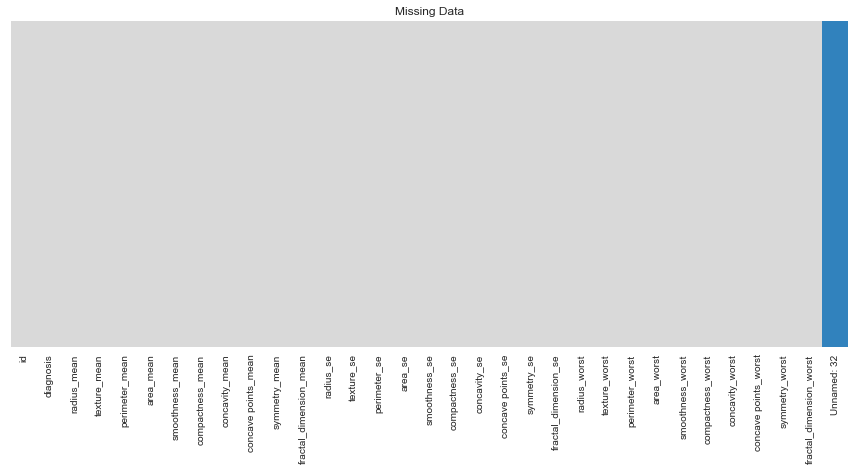

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#missing values across columns
sns.set_style('white')
plt.figure(figsize = (15,6))
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()


data.isnull().sum()

Let's drop the column 'Unnamed: 32' since it contains all null values and does not provide any relevant information

In [7]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

B    357
M    212
Name: diagnosis, dtype: int64


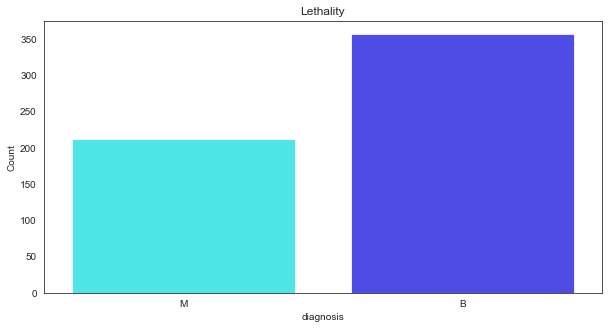

In [8]:
#count by classes
print(data['diagnosis'].value_counts())
#target variable countplot
sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(data['diagnosis'], alpha =.80, palette= ['cyan','blue'])
plt.title('Lethality')
plt.ylabel('Count')
plt.show()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


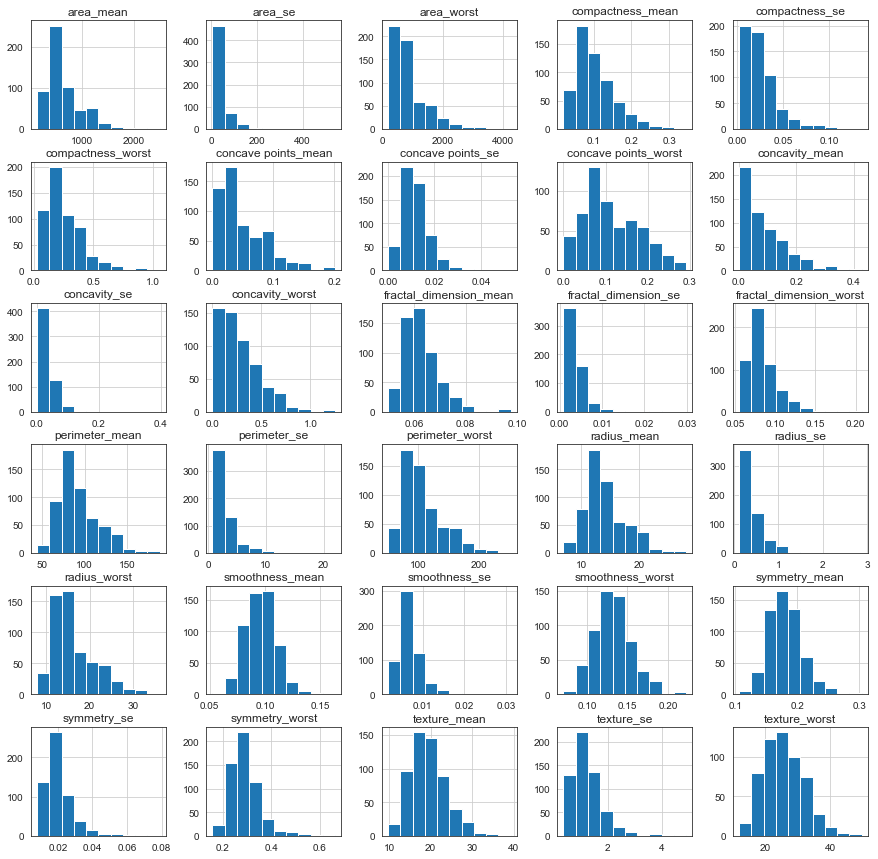

In [9]:
#running descriptive statistics
p=data.hist(figsize = (15,15))
data.describe().transpose()

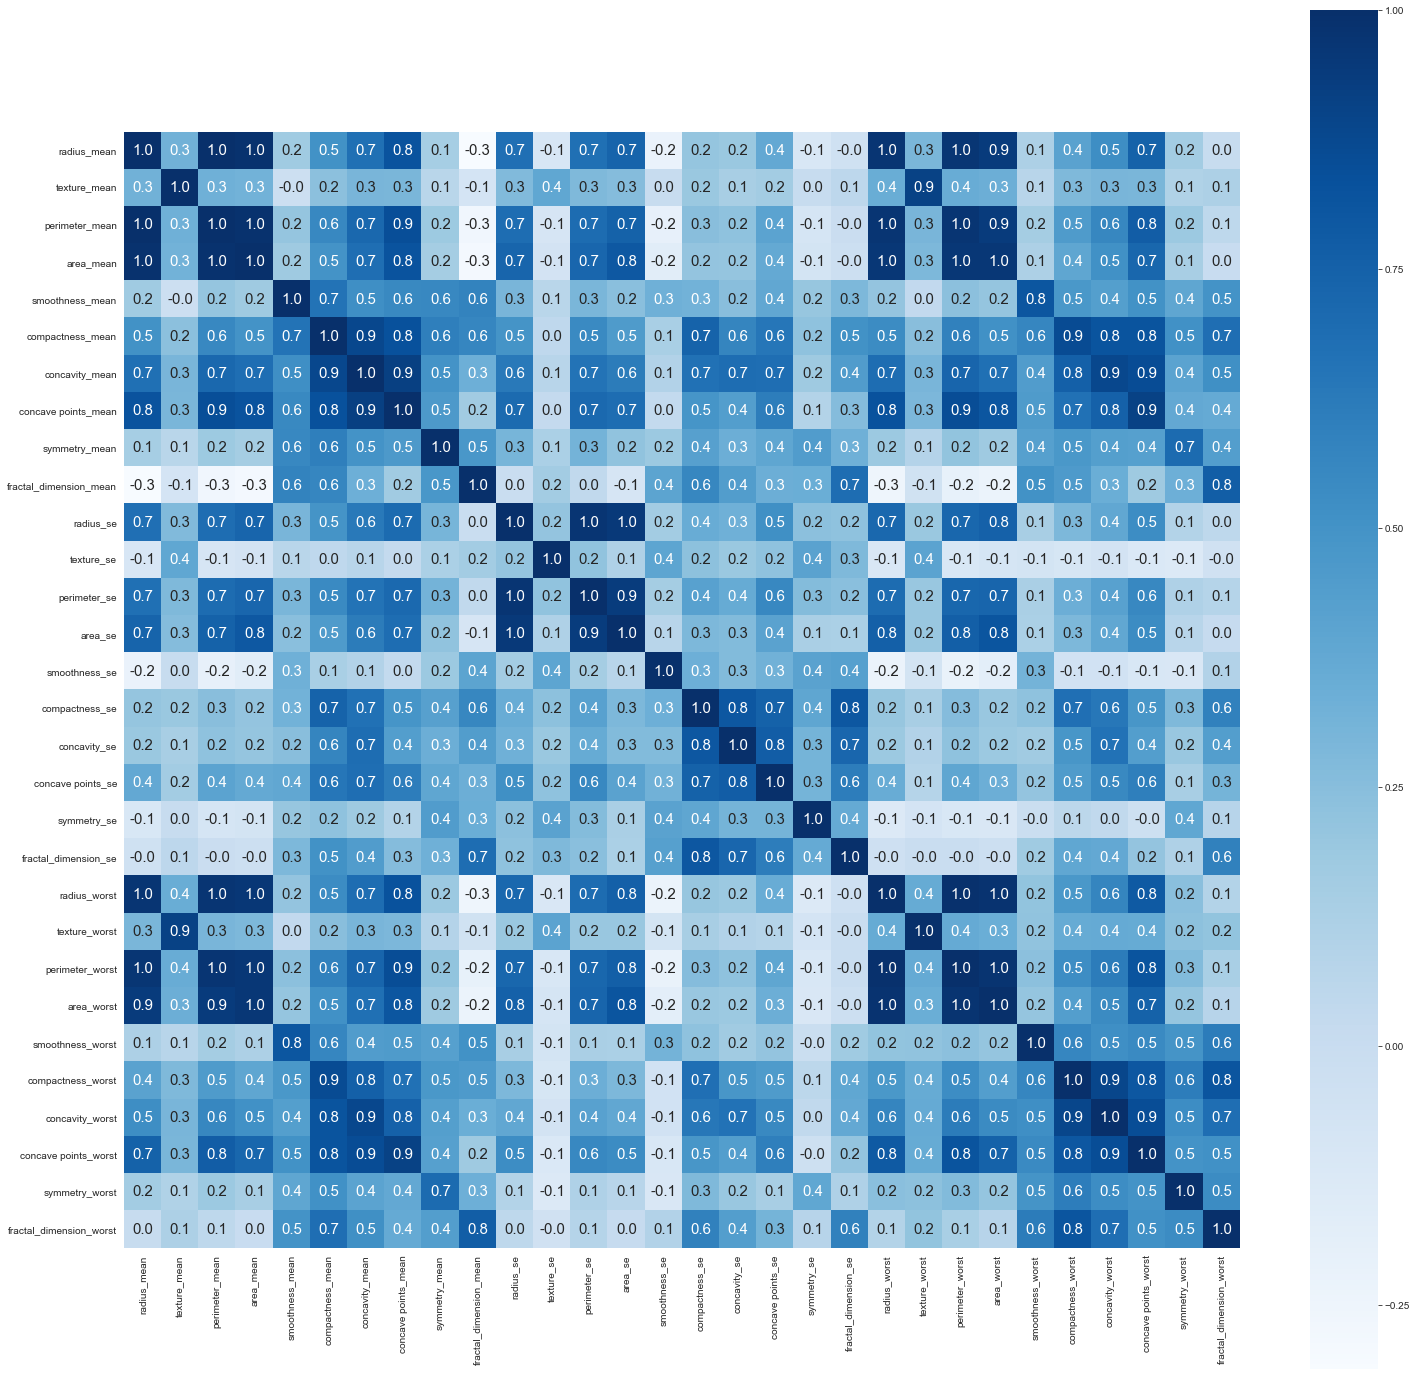

In [10]:
#correlation matrix to check for dependencies
corr = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

* Correlation is a statistical measure that explains how one or more numerical variables are related to each other. It is used to check for linear dependencies between the independent variables/features of the data. 
* Two features are said to be positively correlated with each other if increase in the value of one variable results in the proportional increase in the value of the other. 
* Correlation coefficient can have a value in the range of -1.0 to 1.0. A value of 0 indicates that there is no correlation between the variables

* Plotting distributions for the 2 classes - 

In [11]:
def plot_distribution(variable):
    sns.FacetGrid(data, hue='diagnosis',palette="Set2", height=4.5).map(sns.kdeplot, variable).add_legend()

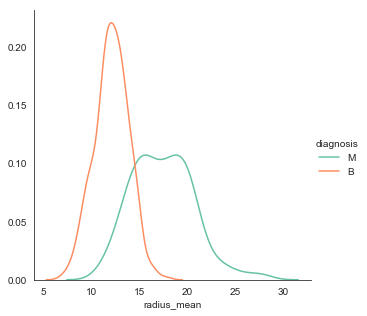

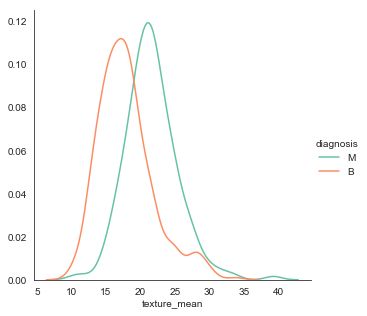

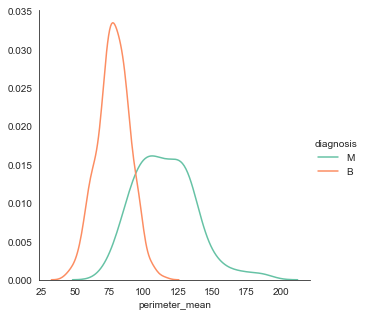

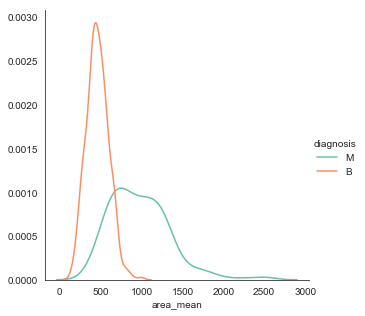

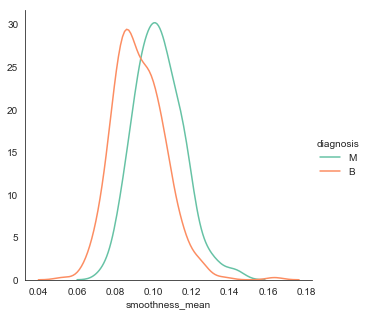

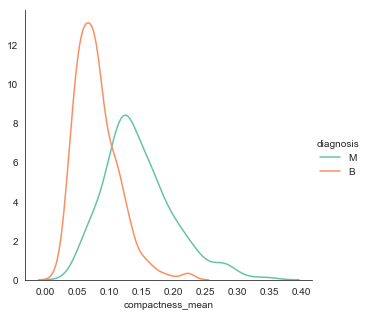

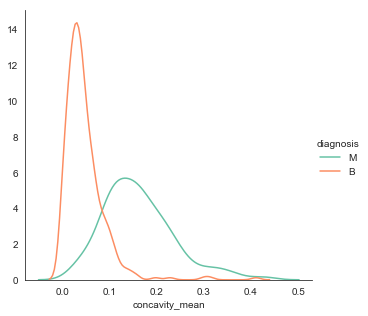

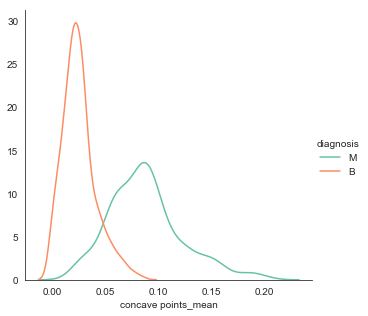

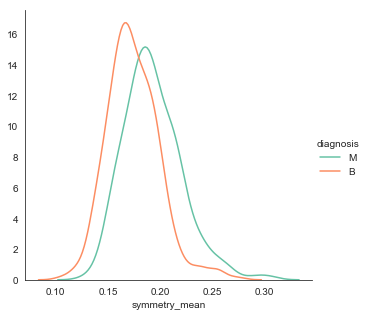

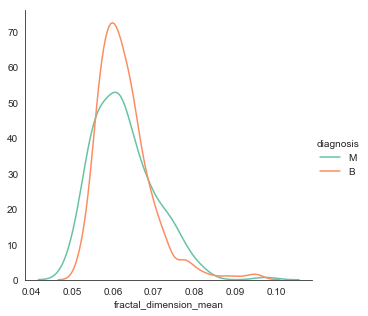

In [12]:
#Plotting distributions 'mean'
plot_distribution("radius_mean")
plot_distribution("texture_mean")
plot_distribution("perimeter_mean")
plot_distribution("area_mean")
plot_distribution("smoothness_mean")
plot_distribution("compactness_mean")
plot_distribution("concavity_mean")
plot_distribution("concave points_mean")
plot_distribution("symmetry_mean")
plot_distribution("fractal_dimension_mean")

**Inferences:**
* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
* Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup

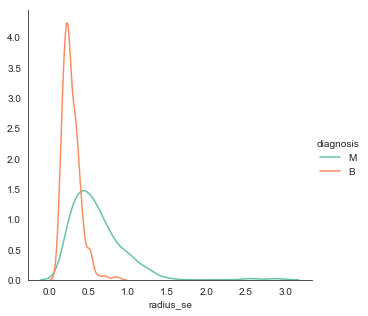

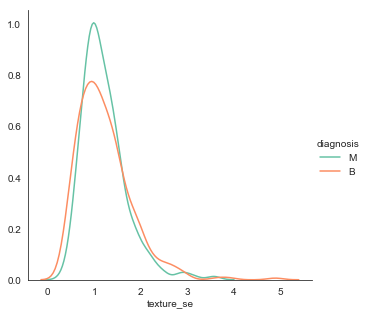

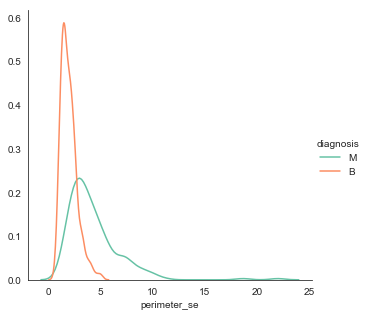

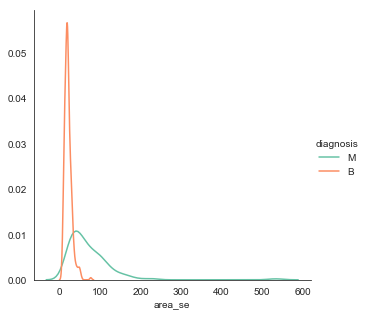

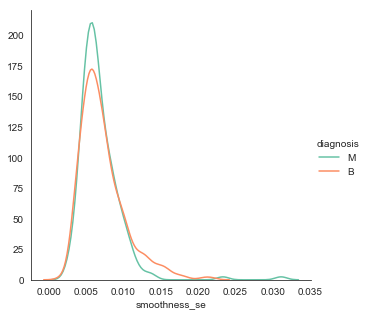

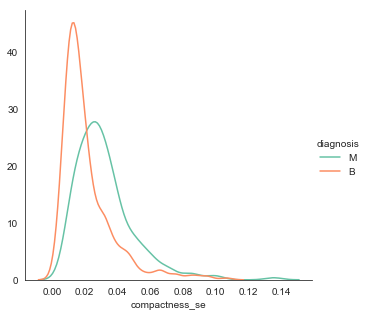

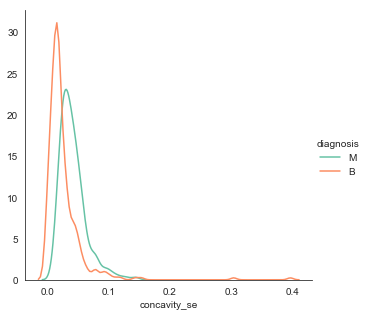

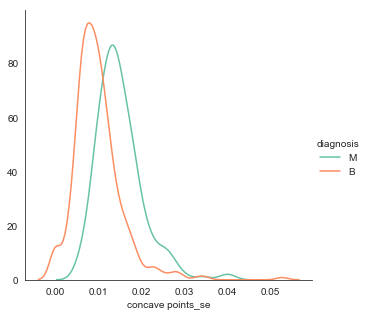

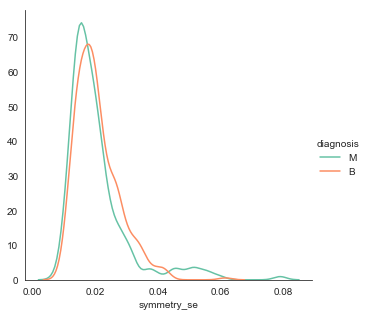

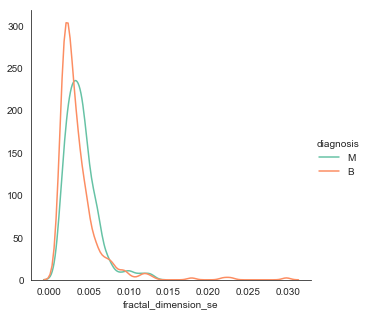

In [13]:
#Plotting distributions 'se'
plot_distribution("radius_se")
plot_distribution("texture_se")
plot_distribution("perimeter_se")
plot_distribution("area_se")
plot_distribution("smoothness_se")
plot_distribution("compactness_se")
plot_distribution("concavity_se")
plot_distribution("concave points_se")
plot_distribution("symmetry_se")
plot_distribution("fractal_dimension_se")

### - Feature Engineering

**Feature Scaling**
* Most of the times, the dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem. 
* We will use Standardization technique to perform feature scaling to obtain the scaled variables using the code below

In [14]:
scaler = StandardScaler()

In [15]:
features = data.drop('diagnosis', axis = 1)

In [16]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
features_array = scaler.fit_transform(features)

In [18]:
features = pd.DataFrame(features_array, index=features.index, columns = features.columns)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### - Splitting data into training and test sets

In [19]:
#creating dataframes from target variable and features
X = features
y = data['diagnosis']

In [20]:
y.replace(["M","B"],[1,0],inplace=True)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [21]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify=y)

* About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
* For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's
* Let's now confirm that the class distribution of the target variable is uniform across both the test and training sets - 


In [22]:
# Checking distribtution of Target varaible in training set
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])*100

37.185929648241206

In [23]:
# Checking distribtution of Target varaible in test set
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])*100

37.42690058479532

Hence we can confirm that the stratifcation of the data was successful

### - PCA

In [24]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns = ['Number of Components'])

In [25]:
explained_variance

,Number of Components
0,0.462703
1,0.169859
2,0.099383
3,0.068537
4,0.050562
5,0.038750
6,0.024285
7,0.015715
8,0.014594
9,0.010632


Text(0, 0.5, 'Variance')

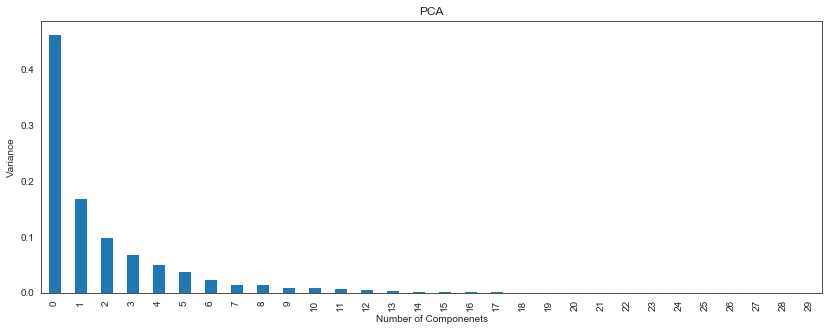

In [26]:
plt.rcParams['figure.figsize']=(14,5)
explained_variance.plot.bar(legend= None)
plt.title('PCA')
plt.xlabel('Number of Componenets')
plt.ylabel('Variance')


It can be seen that the **first 3 components explain 71% of the variance** which is pretty decent! Lets perform PCA on the training set with 3 components as shown below using the fit and transform methods

In [27]:
pca = PCA(n_components = 3)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

#### 1. Logistic Regreesion

In [28]:
# Create a Logistic regression classifier
logreg = LogisticRegression()

In [29]:
# Train the model using the training sets 
logreg.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [31]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_logreg = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_logreg = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg)
print( 'Precision : ',pre_logreg)
print( 'Recall : ',rec_logreg)

Accuracy of Logistic Regression model :  92.98
Precision :  87.14
Recall :  95.31


In [32]:
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

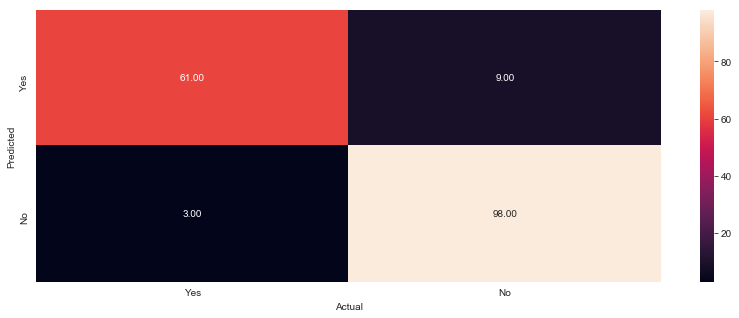

In [33]:
draw_cm(y_test, y_pred)

#### 2. Support Vector Machine

In [34]:
# Create a Support Vector Classifier
svc = svm.SVC()

In [35]:
# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]


In [36]:
#run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

In [38]:
# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [40]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_svm = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_svm = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Support Vector Machine model : ', acc_svm)
print( 'Precision : ',pre_svm)
print( 'Recall : ',rec_svm)

Accuracy of Support Vector Machine model :  92.4
Precision :  86.96
Recall :  93.75


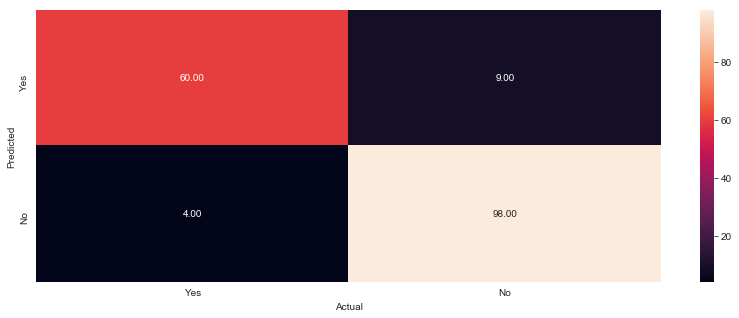

In [41]:
draw_cm(y_test, y_pred)

#### 3. Decision Tree

In [42]:
# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

In [43]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

In [44]:
# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
#Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

In [46]:
# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [48]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_dt = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_dt = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree Model : ', acc_dt)
print( 'Precision : ',pre_dt)
print( 'Recall : ',rec_dt)

Accuracy of Decision Tree Model :  88.3
Precision :  82.35
Recall :  87.5


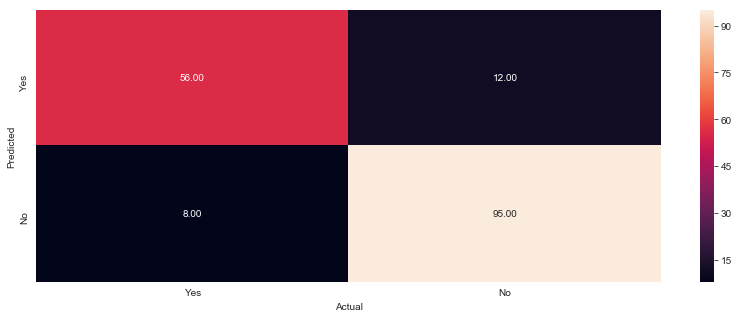

In [49]:
draw_cm(y_test, y_pred)

#### 4. Random Forest

In [50]:
# Create a Random Forest Classifier
rf = RandomForestClassifier()

In [51]:
# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [52]:
# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

In [54]:
# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [56]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_rf = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_rf = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree Model : ', acc_rf)
print( 'Precision : ',pre_rf)
print( 'Recall : ',rec_rf)

Accuracy of Decision Tree Model :  90.64
Precision :  84.29
Recall :  92.19


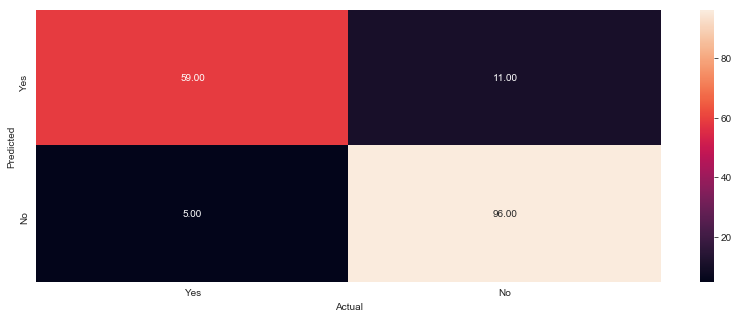

In [57]:
draw_cm(y_test, y_pred)

#### 5. K - Nearest Neighbors

In [58]:
# Create a KNN Classifier
knn = KNeighborsClassifier()

In [59]:
# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

In [60]:
# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [61]:
# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

In [62]:
# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [63]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [64]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_knn = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_knn = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of k-NN model : ', acc_knn)
print( 'Precision : ',pre_knn)
print( 'Recall : ',rec_knn)

Accuracy of k-NN model :  90.64
Precision :  85.29
Recall :  90.62


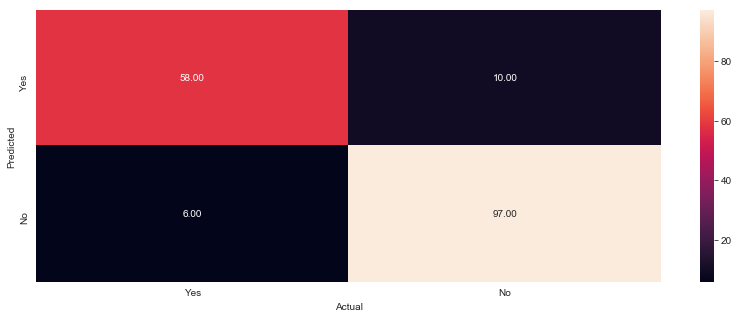

In [65]:
draw_cm(y_test, y_pred)

### - Model Comparison/Interpreting the results

In [66]:
print('Logistic Regression: ',acc_logreg)
print('Support Vector Machine: ' ,acc_svm)
print('Random Forest: ' ,acc_rf)
print('Decision Tree: ' ,acc_dt)
print('K - Nearest Neighbors: ' ,acc_knn)

Logistic Regression:  92.98
Support Vector Machine:  92.4
Random Forest:  90.64
Decision Tree:  88.3
K - Nearest Neighbors:  90.64


We can see from the above table that SVM classifier and Logistic Regression work best for this dataset

# THE END